# T000 · NeuralPLexer an easy-to-follow usage guide

Authors:

- Katharina Buchthal 2024 Volkamerlab, Saarland University, Germany
- Maximilian Bähr 2024 Volkamerlab, Saarland University, Germany


*The examples used in this talktorial template are taken from [__Talktorial T001__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T001_query_chembl/talktorial.ipynb) and [__Talktorial T002__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T002_compound_adme/talktorial.ipynb).*

<div class="alert alert-block alert-info">

<b>Cross-referencing talktorials</b>: If you want to cross-reference to existing talktorials in your notebook, please use the following formatting: <b>Talktorial T000</b>.

</div>

## Aim of this talktorial

Understanding the basics of Neuralplexer and beeing able to use it.

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* Diffusion Models
* 

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._

* Connect to ChEMBL database
* Load and draw molecules

<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Practical</i> section.

</div>

### References

* Paper 
* Tutorial links
* Other useful resources

*We suggest the following citation style:*
* Keyword describing resource: <i>Journal</i> (year), <b>volume</b>, pages (link to resource) 

*Example:*
* ChEMBL web services: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881) 

## Theory

### Diffusion Models

Diffusion models are cool

![ChEMBL web service schema](./images/example_plot.png)

*Figure 1:* 
Describe figure and add reference.
Figure and description taken from: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881).

<div class="alert alert-block alert-info">
    
<b>Figures</b>: Place images in the <code>images/</code> folder and include them using Markdown <code>![Figure title](images/some_figure.jpg)</code>. Add a figure caption in the format shown in the example.

</div>

### Compound activity measures

Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

$pIC_{50} = -log_{10}(IC_{50}*10^{-9})= 9-log_{10}(IC_{50}) $

<div class="alert alert-block alert-info">
    
<b>Formulas</b>: Please use LaTeX to format formulas.
</div>

If you place links, please link descriptive words.

> __Yes__: [ChEMBL](https://www.ebi.ac.uk/chembl/) is a manually curated database of bioactive molecules

> __No__: ChEMBL ([here](https://www.ebi.ac.uk/chembl/)) is a manually curated database of bioactive molecules

<div class="alert alert-block alert-info">
    
<b>Links</b>: If you place links, please link descriptive words.

</div>

## Practical

In the practical part we will use NeuralPLexer to predict a sample structure and the complex (??)

<div class="alert alert-block alert-info">

<b>Sync section titles with TOC</b>: Please make sure that all section titles in the <i>Practical</i> section are synced with the bullet point list provided in the <i>Aim of this talktorial</i> > <i>Contents in Practical</i> section.

</div>

<div class="alert alert-block alert-info">
    
<b>Beware of section levels</b>: Please check if you are using the correct subsection levels. The section <i>Practical</i> is written in Markdown as <code>## Practical</code>, so every subsection within <i>Practical</i> is <code>###</code> or lower.

</div>

### Installation
For GPU version see also: link to docker image
For online cpu version follow the steps below:

since neuralplexer is mostly a command line tool, we can use it in a jupyter notebook.

In [ ]:
import subprocess
import os
os.system('git clone https://github.com/zrqiao/NeuralPLexer.git')
# os.system('echo y | cd NeuralPLexer && conda config --add channels nvidia && conda create -n neuralplexer_dev && conda activate neuralplexer_dev && conda install pytorch torchvision -c pytorch &&conda env update -f environment_dev.yaml && pip install -e .')
# os.system('conda activate neuralplexer_dev && python -m ipykernel install --user --name=neuralplexer_dev_kernel')

def setup_neuralplexer():
    commands = [
        'cd NeuralPLexer',
        'conda config --add channels nvidia',
        'conda config --add channels pytorch',
        'conda create -n neuralplexer_dev -y',  # -y flag automatically answers yes
        'conda run -n neuralplexer_dev conda install -y pytorch torchvision cpuonly -c pytorch',
        'conda run -n neuralplexer_dev conda env update -f./NeuralPLexer/environment_dev.yaml',
        'conda activate neuralplexer_dev',
        'export CMAKE_PREFIX_PATH=${CONDA_PREFIX:-"$(dirname $(which conda))/../"}',
        'export TORCH_CUDA_ARCH_LIST="3.5;5.0;6.0;6.1;7.0;7.5;8.0;8.6"',
        "pip install 'pytorch-lightning<2.0.0'",
        "pip install 'torch-scatter'", 
        "pip install 'fairscale'", 
        "pip install 'mendeleev'", 
        "pip install git+https://github.com/NVIDIA/dllogger.git@0540a43971f4a8a16693a9de9de73c1072020769",
        "pip install git+https://github.com/aqlaboratory/openfold.git@103d0370ad9ce07579c20fa9c889a632f9b16618",
        "pip install git+https://github.com/zrqiao/power_spherical.git@290b1630c5f84e3bb0d61711046edcf6e47200d4", 
        "pip install 'fair-esm'",
        "pip install 'seaborn'",
        "pip install 'dl-lite'",
        'conda run -n neuralplexer_dev pip install -e .',
        'python -m ipykernel install --user --name=neuralplexer_dev_kernel',
    ]
    
    for cmd in commands:
        try:
            print(f"Executing: {cmd}")
            print(f"Command completed successfully\n")
        except subprocess.CalledProcessError as e:
            print(f"Error executing command: {cmd}")
            print(f"Error message: {str(e)}")
            return False
    
    print("Setup completed successfully!")
    print("To activate the environment, run: conda activate neuralplexer_dev")
    return True

setup_neuralplexer()

fatal: destination path 'NeuralPLexer' already exists and is not an empty directory.


Executing: cd NeuralPLexer
Command completed successfully

Executing: conda config --add channels nvidia


Command completed successfully

Executing: conda config --add channels pytorch


Command completed successfully

Executing: conda create -n neuralplexer_dev -y
Channels:
 - pytorch
 - nvidia
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/maxb/miniconda/envs/neuralplexer_dev



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
#
# To activate this environment, use
#
#     $ conda activate neuralplexer_dev
#
# To deactivate an active environment, use
#
#     $ conda deactivate

Command completed successfully

Executing: conda run -n neuralplexer_dev conda install -y pytorch torchvision cpuonly -c pytorch
Channels:
 - pytorch
 - nvidia
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/maxb/miniconda/envs/neuralplexer_dev

  added / updated specs:
    - cpuonly
    - pytorch
    - torchvision


The following NEW packages w


CondaError: Run 'conda init' before 'conda activate'



False

Now we have to switch the notebook kernel to the one we just created.

in the top right corner of the notebook, click on the drop down menu and select the kernel you just created (neuralplexer_dev_kernel).



Please Note that Neuralplexer is a command line tool. it will be executed from the command line. 
Therefore if you want to follow the steps from this notebook you need to open a terminal and execute the commands from there.

### Running NeuralPLexer mode1

_In this section we will use NeuralPLexer to infer the protein structure of a given sequence._

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from Bio import PDB
import py3Dmol
import tempfile
import os
import base64
from pathlib import Path
from IPython.display import display

def load_ligands(sdf_file):
    """Load ligands from SDF file."""
    if not os.path.exists(sdf_file):
        raise FileNotFoundError(f"SDF file not found: {sdf_file}")
    
    suppl = Chem.SDMolSupplier(sdf_file)
    molecules = [mol for mol in suppl if mol is not None]
    
    if not molecules:
        raise ValueError(f"No valid molecules found in {sdf_file}")
    
    return molecules

def load_proteins(pdb_file):
    """Load proteins from PDB file."""
    if not os.path.exists(pdb_file):
        raise FileNotFoundError(f"PDB file not found: {pdb_file}")
    
    parser = PDB.PDBParser(QUIET=True)
    try:
        structure = parser.get_structure('proteins', pdb_file)
        models = list(structure.get_models())
        
        if not models:
            raise ValueError(f"No valid models found in {pdb_file}")
        
        return models
    except Exception as e:
        raise ValueError(f"Error parsing PDB file: {str(e)}")

def visualize_pair(protein_model, ligand, index, output_dir='output'):
    """
    Visualize a protein-ligand pair in Jupyter notebook.
    Returns the viewer object for display.
    """
    # Create output directory if it doesn't exist
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Add hydrogens to ligand
    ligand = Chem.AddHs(ligand)
    
    # Create temporary files
    temp_pdb = tempfile.NamedTemporaryFile(suffix='.pdb', mode='w', delete=False)
    temp_lig = tempfile.NamedTemporaryFile(suffix='.pdb', mode='w', delete=False)
    
    try:
        # Save protein
        io = PDB.PDBIO()
        io.set_structure(protein_model)
        io.save(temp_pdb.name)
        
        # Prepare and save ligand
        try:
            AllChem.EmbedMolecule(ligand, randomSeed=42)
            AllChem.MMFFOptimizeMolecule(ligand)
        except:
            print(f"Warning: Could not generate 3D coordinates for ligand {index}")
            
        pdb = Chem.MolToPDBBlock(ligand)
        temp_lig.write(pdb)
        temp_lig.flush()
        
        # Create viewer
        view = py3Dmol.view(width=800, height=600)
        
        # Load structures
        with open(temp_pdb.name, 'r') as f:
            view.addModel(f.read(), "pdb")
        with open(temp_lig.name, 'r') as f:
            view.addModel(f.read(), "pdb")
        
        # Style the visualization
        view.setStyle({'model': 0}, {
            'cartoon': {'color': 'spectrum'},
            'surface': {'opacity': 0.7}
        })
        view.setStyle({'model': 1}, {
            'stick': {'colorscheme': 'elementColors'},
            'sphere': {'scale': 0.3}
        })
        
        # Set view options
        view.zoomTo()
        view.setBackgroundColor('white')
        
        return view
        
    finally:
        # Clean up temporary files
        for temp_file in [temp_pdb, temp_lig]:
            try:
                os.unlink(temp_file.name)
            except:
                pass

def main():
    try:
        # Create output directory
        output_dir = 'visualization_output'
        Path(output_dir).mkdir(parents=True, exist_ok=True)
        
        # Load molecules
        ligands = load_ligands('./data/results_trajectory_6np5/_lig.sdf')
        proteins = load_proteins('./data/results_trajectory_6np5/_prot.pdb')

        #flex receptor
        #ligands = load_ligands('./data/results_flexible_receptor_6np5/lig_ref.sdf')
        #proteins = load_proteins('./data/results_flexible_receptor_6np5/prot_all.pdb')

        #rigid receptor
        #ligands = load_ligands('./data/results_rigid_receptor_6np5/lig_rank1_plddt0.6683360.sdf')
        #proteins = load_proteins('./data/results_rigid_receptor_6np5/prot_all.pdb')

        # Verify we have equal numbers of proteins and ligands
        if len(ligands) != len(proteins):
            raise ValueError(f"Number of proteins ({len(proteins)}) and ligands ({len(ligands)}) must match")
        
        # Process each pair
        for i, (protein, ligand) in enumerate(zip(proteins, ligands)):
            print(f"Processing pair {i+1}/{len(proteins)}")
            try:
                view = visualize_pair(protein, ligand, i+1, output_dir=output_dir)
                display(view)
            except Exception as e:
                print(f"Error processing pair {i+1}: {str(e)}")
                continue
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'py3Dmol'

In [ ]:
import os



In [ ]:
#NO CUDA!
#NOT FINAL
os.system(
    """neuralplexer-inference 
            --task batched_structure_sampling 
            --sampler VPSDE 
            --input-receptor /media/max/2de90687-8e6f-4428-b0db-8ef542f5ffa7/neuralplexermodels_downstream_datasets_predictions/downstream_test_datasets/pdbbind_tasks/binding_site_recovery/6V5LA/protein.pdb 
            --input-ligand /media/max/2de90687-8e6f-4428-b0db-8ef542f5ffa7/neuralplexermodels_downstream_datasets_predictions/downstream_test_datasets/pdbbind_tasks/binding_site_recovery/6V5LA/ligand.sdf 
            --model-checkpoint /media/max/2de90687-8e6f-4428-b0db-8ef542f5ffa7/neuralplexermodels_downstream_datasets_predictions/models/complex_structure_prediction.ckpt 
            --out-path ./out 
            --separate-pdb 
            --n-samples 8 
            --chunk-size 1 
            --num-steps=30/media/max/2de90687-8e6f-4428-b0db-8ef542f5ffa7/docker"""
)


In [15]:
import os
from openbabel import pybel
import subprocess

## Docking comparision
Within this section, we will compare NeuralPLexer with convential docking. We will use the docking tool TODO, that performs rigid-body-flexible-ligand docking. To make a *fair* comparision, we will (1) run templated NeuralPLexer task that will use a given protein strcuture - here the structure of the input sequence - as template. (2) we will run docking on that structure, and (3) calculcate the RMSD between the respective resulting ligand conformation with the cocrystallized one (`6np5`).

### Templated NeuralPLexer

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
os.system("""neuralplexer-inference --task=batched_structure_sampling \
                --input-receptor data/6np5/protein.pdb \
                --input-ligand data/6np5/ligand.sdf \
                --out-path data/results_rigid_receptor_6np5  \
                --model-checkpoint data/models/complex_structure_prediction.ckpt \
		        --input-template data/6np5/protein.pdb \
		        --use-template \
                --n-samples 1 \
                --chunk-size 1 \
                --num-steps=40 \
		        --rank-outputs-by-confidence \
                --sampler=langevin_simulated_annealing""")

/home/katharina/miniforge3/envs/neuralplexer_dev/lib/python3.10/site-packages/lightning_fabric/utilities/cloud_io.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return

Could not load pretrained MHT weights, skipping


/home/katharina/miniforge3/envs/neuralplexer_dev/lib/python3.10/site-packages/pytorch_lightning/core/saving.py:251: UserWarning: Found keys that are in the model state dict but not in the checkpoint: ['atnum2vdw_uff', 'plm.embed_tokens.weight', 'plm.layers.0.self_attn.k_proj.weight', 'plm.layers.0.self_attn.k_proj.bias', 'plm.layers.0.self_attn.v_proj.weight', 'plm.layers.0.self_attn.v_proj.bias', 'plm.layers.0.self_attn.q_proj.weight', 'plm.layers.0.self_attn.q_proj.bias', 'plm.layers.0.self_attn.out_proj.weight', 'plm.layers.0.self_attn.out_proj.bias', 'plm.layers.0.self_attn.rot_emb.inv_freq', 'plm.layers.0.self_attn_layer_norm.weight', 'plm.layers.0.self_attn_layer_norm.bias', 'plm.layers.0.fc1.weight', 'plm.layers.0.fc1.bias', 'plm.layers.0.fc2.weight', 'plm.layers.0.fc2.bias', 'plm.layers.0.final_layer_norm.weight', 'plm.layers.0.final_layer_norm.bias', 'plm.layers.1.self_attn.k_proj.weight', 'plm.layers.1.self_attn.k_proj.bias', 'plm.layers.1.self_attn.v_proj.weight', 'plm.layer

Could not load pretrained MHT weights, skipping


/home/katharina/miniforge3/envs/neuralplexer_dev/lib/python3.10/site-packages/pytorch_lightning/core/saving.py:251: UserWarning: Found keys that are in the model state dict but not in the checkpoint: ['atnum2vdw_uff', 'plm.embed_tokens.weight', 'plm.layers.0.self_attn.k_proj.weight', 'plm.layers.0.self_attn.k_proj.bias', 'plm.layers.0.self_attn.v_proj.weight', 'plm.layers.0.self_attn.v_proj.bias', 'plm.layers.0.self_attn.q_proj.weight', 'plm.layers.0.self_attn.q_proj.bias', 'plm.layers.0.self_attn.out_proj.weight', 'plm.layers.0.self_attn.out_proj.bias', 'plm.layers.0.self_attn.rot_emb.inv_freq', 'plm.layers.0.self_attn_layer_norm.weight', 'plm.layers.0.self_attn_layer_norm.bias', 'plm.layers.0.fc1.weight', 'plm.layers.0.fc1.bias', 'plm.layers.0.fc2.weight', 'plm.layers.0.fc2.bias', 'plm.layers.0.final_layer_norm.weight', 'plm.layers.0.final_layer_norm.bias', 'plm.layers.1.self_attn.k_proj.weight', 'plm.layers.1.self_attn.k_proj.bias', 'plm.layers.1.self_attn.v_proj.weight', 'plm.layer

0

### Docking with Autodock
For the docking benchmark we employ the AutoDock (TODO cite) docking engine, which was already introduced in the Talktorial T015 (TODO link). Here, we will first prepare the ligand and protein for docking, and secondly run the docking itself. **Note**, that the functionality for this is taken from Talktorial T015 (TODO link).

#### Protein and ligand preparation
AutoDock requires the protein and the ligand to be provided in two PDBQT files. Thus, we will first convert the crystallized protein structure into the PDBQT format. Secondly, we will calculated the 3D cooradinates of the ligand and save it likewise to an PDBQT file. 

In [2]:
def pdb_to_pdbqt(pdb_path, pdbqt_path, pH=7.4):
    """
    Convert a PDB file to a PDBQT file needed by docking programs of the AutoDock family.

    Parameters
    ----------
    pdb_path: str or pathlib.Path
        Path to input PDB file.
    pdbqt_path: str or pathlib.path
        Path to output PDBQT file.
    pH: float
        Protonation at given pH.
    """
    molecule = list(pybel.readfile("pdb", str(pdb_path)))[0]
    # add hydrogens at given pH
    molecule.OBMol.CorrectForPH(pH)
    molecule.addh()
    # add partial charges to each atom
    for atom in molecule.atoms:
        atom.OBAtom.GetPartialCharge()
    molecule.write("pdbqt", str(pdbqt_path), overwrite=True)
    return


In [3]:
# convert protein to PDBQT format
pdb_to_pdbqt("data/6np5/protein.pdb", "data/6np5/protein.pdbqt")

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is data/6np5/protein.pdb)



In [11]:
def sdf_to_pdbqt(sdf_path, pdbqt_path, pH=7.4):
    """
    Convert a SDF file to a PDBQT file needed by docking programs of the AutoDock family. (Adapted from T015)

    Parameters
    ----------
    sdf_path: str or pathlib.path
        Path to input SDF file.
    pdbqt_path: str or pathlib.path
        Path to output PDBQT file.
    pH: float
        Protonation at given pH.
    """
    molecule = next(pybel.readfile("sdf", sdf_path))
    # add hydrogens at given pH
    molecule.OBMol.CorrectForPH(pH)
    molecule.addh()
    # generate 3D coordinates
    molecule.make3D(forcefield="mmff94s", steps=10000)
    # add partial charges to each atom
    for atom in molecule.atoms:
        atom.OBAtom.GetPartialCharge()
    molecule.write("pdbqt", str(pdbqt_path), overwrite=True)
    return

In [12]:
# convert the ligand into PDBQT format
sdf_to_pdbqt("data/6np5/ligand.sdf", "data/6np5/ligand.pdbqt")

### Docking

In [20]:
def run_smina(
    ligand_path, protein_path, autobox_ligand_path, out_path, num_poses=10, exhaustiveness=8
):
    """
    Perform docking with Smina.

    Parameters
    ----------
    ligand_path: str or pathlib.Path
        Path to ligand PDBQT file that should be docked.
    protein_path: str or pathlib.Path
        Path to protein PDBQT file that should be docked to.
    out_path: str or pathlib.Path
        Path to which docking poses should be saved, SDF or PDB format.
    num_poses: int
        Maximum number of poses to generate.
    exhaustiveness: int
        Accuracy of docking calculations.

    Returns
    -------
    output_text: str
        The output of the Smina calculation.
    """
    output_text = subprocess.check_output(
        [
            "smina",
            "--ligand",
            str(ligand_path),
            "--receptor",
            str(protein_path),
            "--out",
            str(out_path),
            "--autobox_ligand",
            str(autobox_ligand_path),
            "--num_modes",
            str(num_poses),
            "--exhaustiveness",
            str(exhaustiveness),
        ],
        universal_newlines=True,  # needed to capture output text
    )
    return output_text

In [45]:
output_text = run_smina(
    "data/6np5/ligand.mol2",
    "data/6np5/protein.pdbqt",
    "data/6np5/ligand.mol2",
    "data/results_rigid_receptor_6np5/docking_poses.sdf",
    num_poses=1
)
print(output_text)

   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1.923        num_tors_div

Using random seed: -505296952

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------


### Visualizing NP and Docking results 

In [42]:
import nglview as nv
from rdkit.Chem import rdMolAlign

In [46]:
view = nv.show_structure_file(
    "data/results_rigid_receptor_6np5/docking_poses.sdf",
    representations=[{"params": {}, "type": "licorice"}],
)
view

NGLWidget()

### Calculating the RMSD

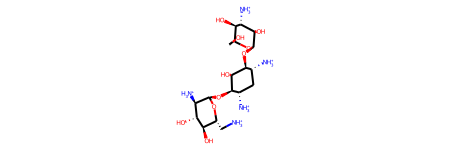

In [38]:
# load cocrystallized liagnd
with Chem.SDMolSupplier('data/6np5/ligand.sdf') as suppl:
  ligand_original = next(suppl)
ligand_original

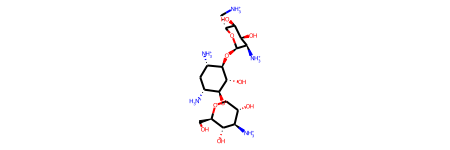

In [47]:
# load docking pose
with Chem.SDMolSupplier('data/results_rigid_receptor_6np5/docking_poses.sdf') as suppl:
  ligand_docking = next(suppl)
ligand_docking

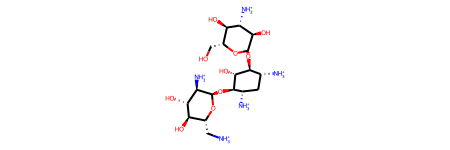

In [48]:
# load np result
with Chem.SDMolSupplier('data/results_rigid_receptor_6np5/lig_all.sdf') as suppl:
  ligand_np = next(suppl)
ligand_np

In [53]:
print(f"RMSD between NP ligand pose and cocrystallized pose:\t{rdMolAlign.CalcRMS(ligand_np, ligand_original)}")
print(f"RMSD between docking pose and cocrystallized pose:\t{rdMolAlign.CalcRMS(ligand_docking, ligand_original)}")

RMSD between NP ligand pose and cocrystallized pose:	2.054057710602321
RMSD between docking pose and cocrystallized pose:	8.657857484004534


## Discussion

Wrap up the talktorial's content here and discuss pros/cons and open questions/challenges.

## Quiz

Ask three questions that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.

1. Question
2. Question
3. Question

<div class="alert alert-block alert-info">

<b>Useful checks at the end</b>: 
    
<ul>
<li>Clear output and rerun your complete notebook. Does it finish without errors?</li>
<li>Check if your talktorial's runtime is as excepted. If not, try to find out which step(s) take unexpectedly long.</li>
<li>Flag code cells with <code># TODO: CI</code> that have deterministic output and should be tested within our Continuous Integration (CI) framework.</li>
</ul>

</div>